In [1]:
from Utils.analyse import Analyser
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
f = '/home/matheus_cascalho/Documents/Matheus Cascalho/MINDS/TimeSeries_Lab/Testes/AirQuality/AirQualityUCI.csv'

In [4]:
df = pd.read_csv(f, sep=';')

In [5]:
data = df['PT08.S1(CO)'].dropna()

In [6]:
an = Analyser(data)

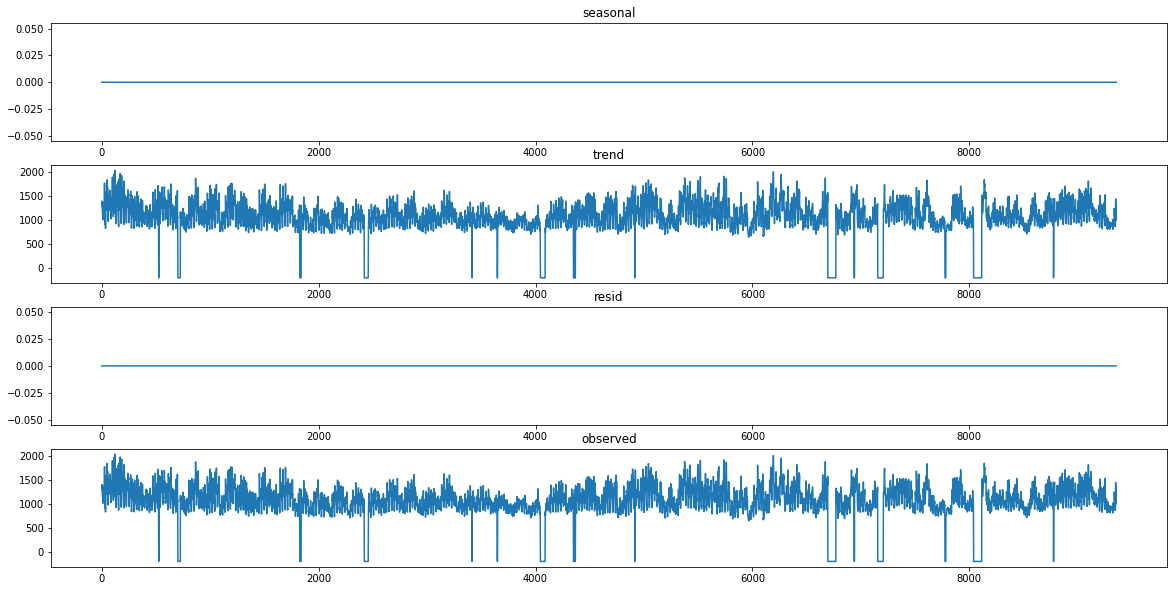

In [7]:
l = ['seasonal', 'trend', 'resid', 'observed']
g = an.plot_decomposition(*l, figsize=(20,10));

In [8]:
print(an)

A série é estacionária!!
As variâncias das sub-amostras não são iguais



In [9]:
cols = [c for c in df.columns if 'PT' in c]

In [10]:
an.reset(df['PT08.S5(O3)'].dropna())

In [11]:
print(an)

A série é estacionária!!
As variâncias das sub-amostras não são iguais



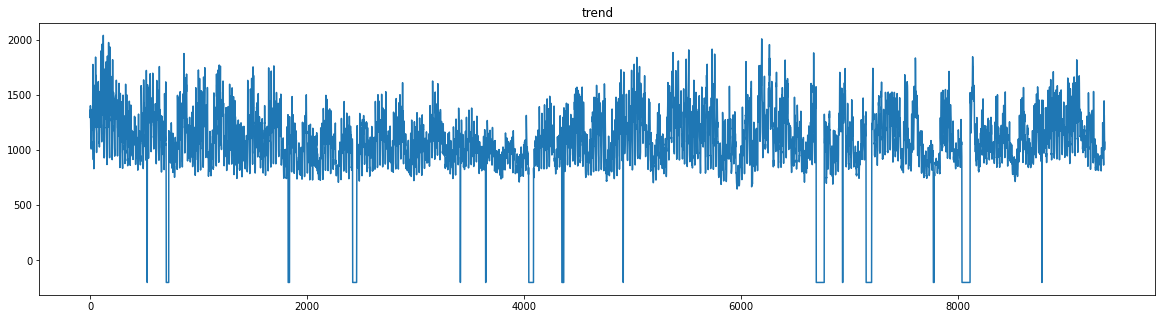

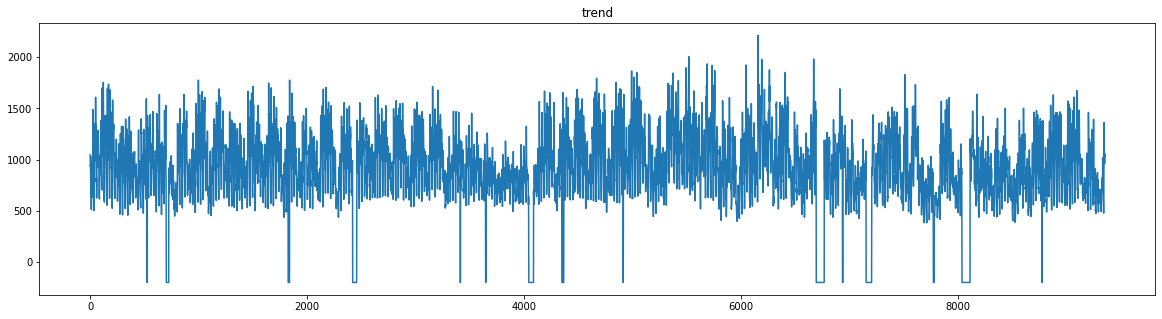

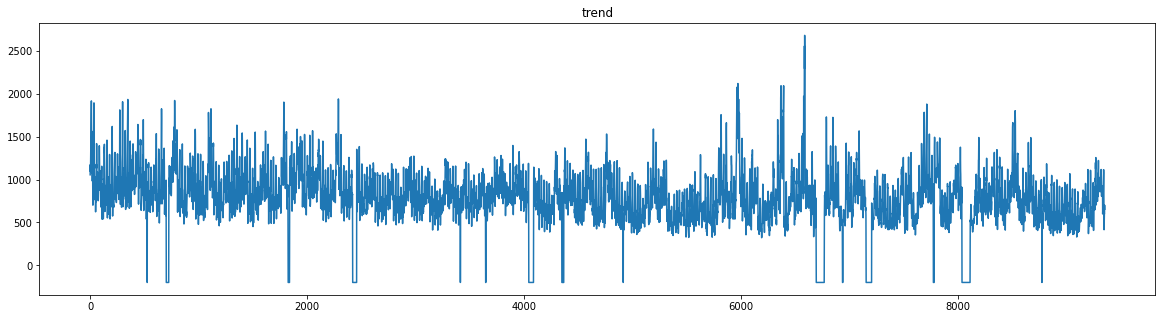

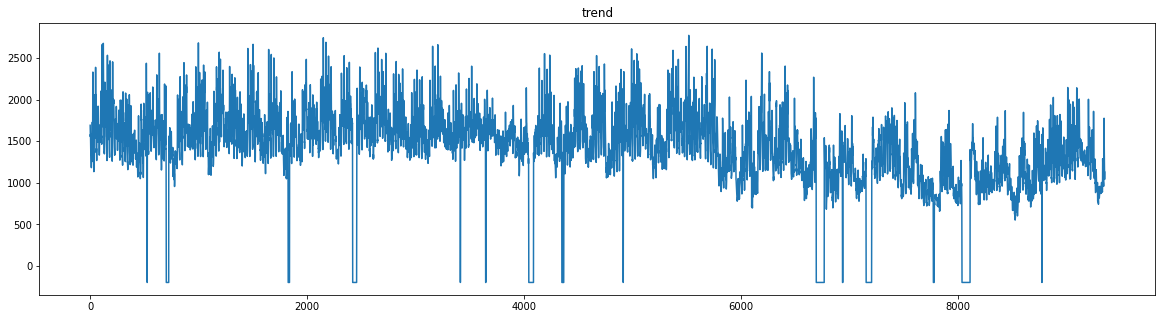

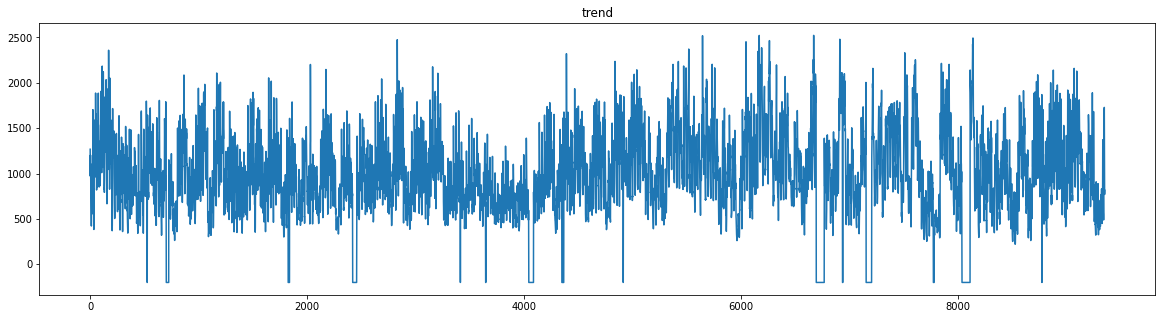

In [12]:
for c in cols:
    an.reset(df[c].dropna())
    an.plot_decomposition('trend', figsize=(20,5));

In [13]:
an.model = 'multiplicative'

In [14]:
an.decomposition()

Exceção: <class 'ValueError'>

Foi adotado o modelo padrão additive


In [15]:
an.freq = 3

In [16]:
# for i in range(1,100, 10):
#     an.freq = i
#     an.plot_decomposition('trend', figsize=(20,5))
#     plt.title(f'trend - freq: {i}');

In [17]:
print(an)

A série é estacionária!!
As variâncias das sub-amostras não são iguais



In [18]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
an.homoscedasticity()

,Dataset,Levene Statistic,p-value,Result,Cedasticidade
0,DATA,261.295338,5.446067e-58,H0 Rejected,Heterocedástica


In [20]:
an.stationarity()

,Dataset,ADF Statistic,p-value,Result,Estacionariedade
0,DATA,-11.401111,7.644253e-21,H0 Rejected,Estacionária


In [21]:
print(an)

A série é estacionária!!
As variâncias das sub-amostras não são iguais



In [22]:
data.describe()

count    9357.000000
mean     1048.990061
std       329.832710
min      -200.000000
25%       921.000000
50%      1053.000000
75%      1221.000000
max      2040.000000
Name: PT08.S1(CO), dtype: float64

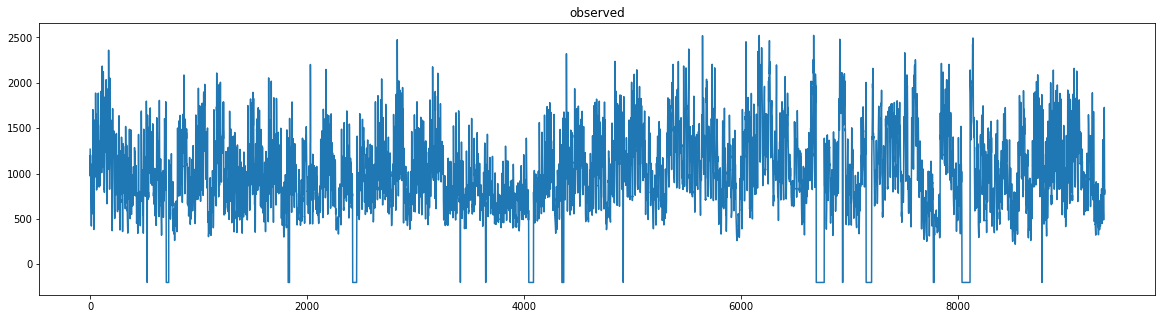

In [23]:
an.plot_decomposition('observed', figsize=(20,5));

In [24]:
from pyFTS.common import Transformations

In [25]:
diff = Transformations.Differential(1)

In [26]:
dados_diff = diff.apply(data)

In [27]:
Transformations.Differential(4).apply(data)

[0, 0, 0, 0]

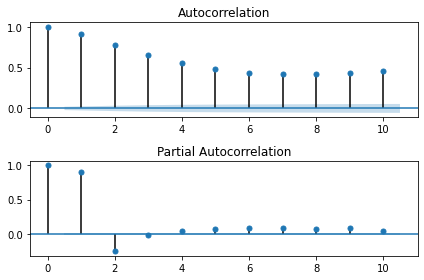

In [28]:
an.acf();

In [29]:
boxcox = Transformations.BoxCox(2)

dados_diff = boxcox.apply(data)

# plot(dados_diff)

In [30]:
new_an = Analyser(dados_diff)

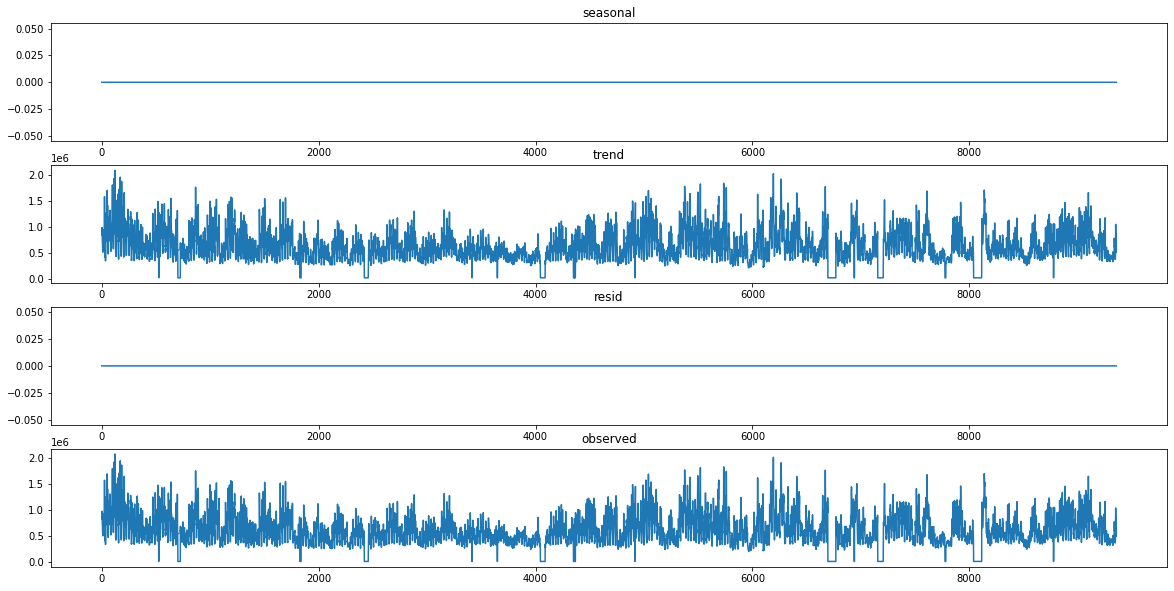

In [31]:
new_an.plot_decomposition(*l, figsize=(20,10));

In [32]:
from pyFTS.data import NASDAQ

ndq = NASDAQ.get_data()


In [33]:
an.reset(ndq)

In [34]:
print(an)

A série é não-estacionária!!
As variâncias das sub-amostras não são iguais



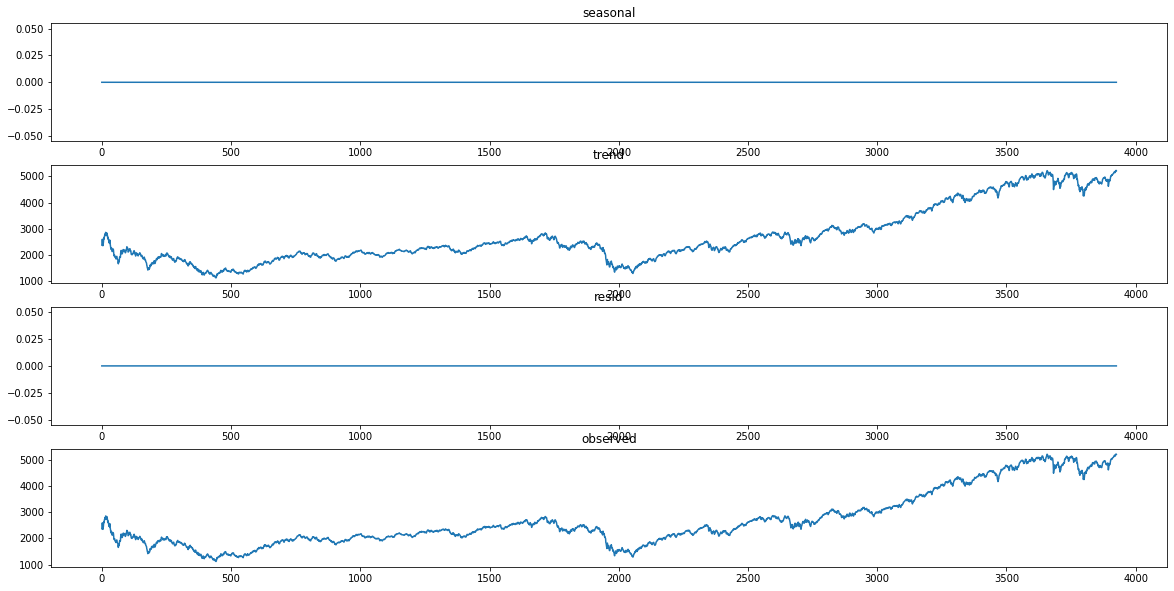

In [35]:
an.plot_decomposition(*l, figsize=(20,10));

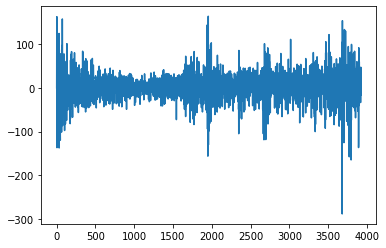

In [36]:
diff = Transformations.Differential(1)

dados_diff = diff.apply(ndq)

plt.plot(dados_diff)

In [37]:
new_an = Analyser(dados_diff)

In [38]:
print(new_an)

A série é estacionária!!
As variâncias das sub-amostras não são iguais



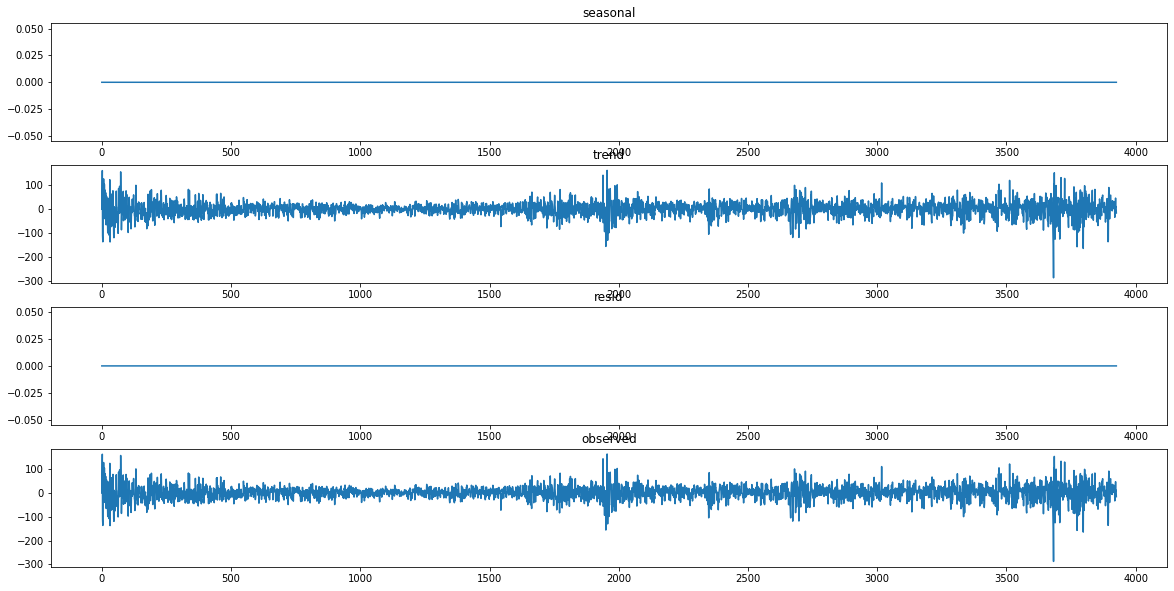

In [39]:
new_an.plot_decomposition(*l, figsize=(20,10));

In [40]:
new_an.homoscedasticity()

,Dataset,Levene Statistic,p-value,Result,Cedasticidade
0,DATA,38.221373,6.960863e-10,H0 Rejected,Heterocedástica


In [41]:
from pyFTS.data import AirPassengers

In [42]:
data = AirPassengers.get_dataframe()
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

In [43]:
data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [44]:
from pyFTS.common import Transformations

In [45]:
trend = Transformations.LinearTrend(data_field='Passengers', index_type='datetime', 
                                    index_field='Month', datetime_mask='%Y-%m')
trend.train(data)

/home/matheus_cascalho/.local/lib/python3.7/site-packages/pyFTS/common/Transformations.py:280: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


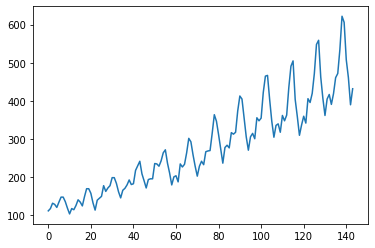

In [46]:
plt.plot(data['Passengers'])

In [47]:
datad = trend.apply(data[20:])

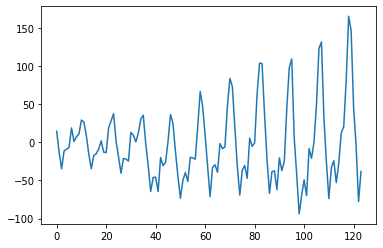

In [48]:
plt.plot(datad)

In [49]:
data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [50]:
an = Analyser(data['Passengers'])

In [51]:
print(an)

A série é não-estacionária!!
As variâncias das sub-amostras não são iguais



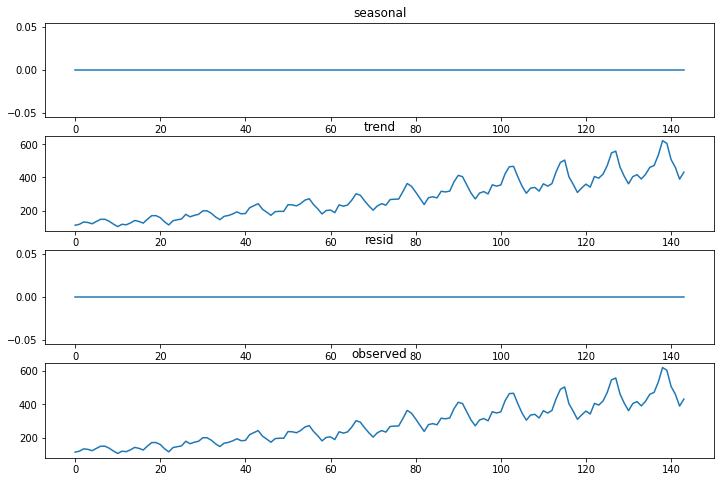

In [52]:
an.plot_decomposition(*l);

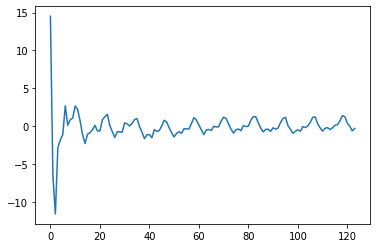

In [53]:
datad2 = [y/(t+1) for t, y in enumerate(datad)]
plt.plot(datad2)

In [54]:
an.reset(datad2[20:], name='datad2')

In [55]:
print(an)

A série é não-estacionária!!
As variâncias das sub-amostras são iguais 



In [56]:
an.homoscedasticity()

,Dataset,Levene Statistic,p-value,Result,Cedasticidade
0,datad2,3.130543,0.079827,H0 Accepted,Homocedástica


In [57]:
an.analyse()

In [58]:
print(an
     )

A série é não-estacionária!!
As variâncias das sub-amostras são iguais 



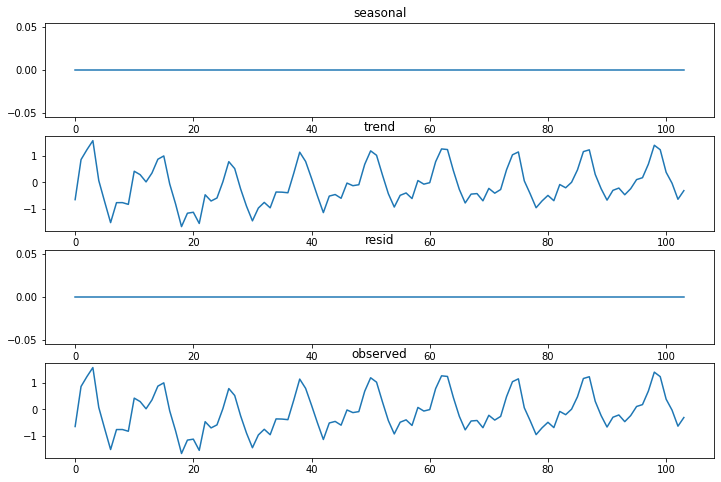

In [60]:
an.plot_decomposition(*l);